In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [3]:
data = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
data = pd.DataFrame(data)

# Eating habits Attributes:¶
Frequent consumption of high caloric food (FAVC),
Frequency of consumption of vegetables (FCVC),
Number of main meals (NCP),
Consumption of food between meals (CAEC),
Consumption of water daily (CH20),
Consumption of alcohol (CALC).
"""
#physical condition Attributes
Calories consumption monitoring (SCC),
Physical activity frequency (FAF),
Time using technology devices (TUE),
Transportation used (MTRANS)

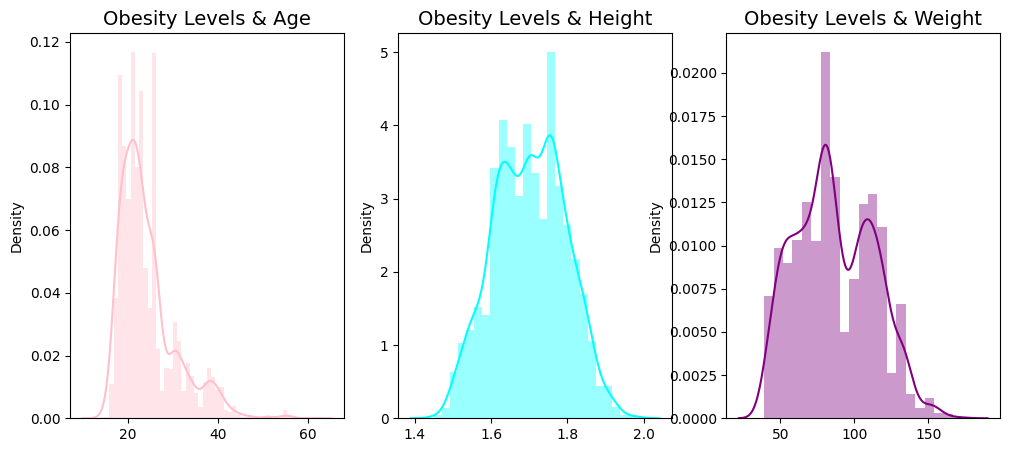

In [7]:
from re import IGNORECASE
import warnings
warnings.filterwarnings('ignore')

# Distribution of different type of amount
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = data.Age.values
Height= data.Height.values
Weight = data.Weight.values

sns.distplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

In [8]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

In [9]:
target_count = data['NObeyesdad'].value_counts()
target_unique = data['NObeyesdad'].unique()

In [10]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.pie(values= target_count, names = target_unique,color_discrete_sequence=px.colors.qualitative.Pastel1 ,title = "the number of people related to each type of obesity level")

fig.show()

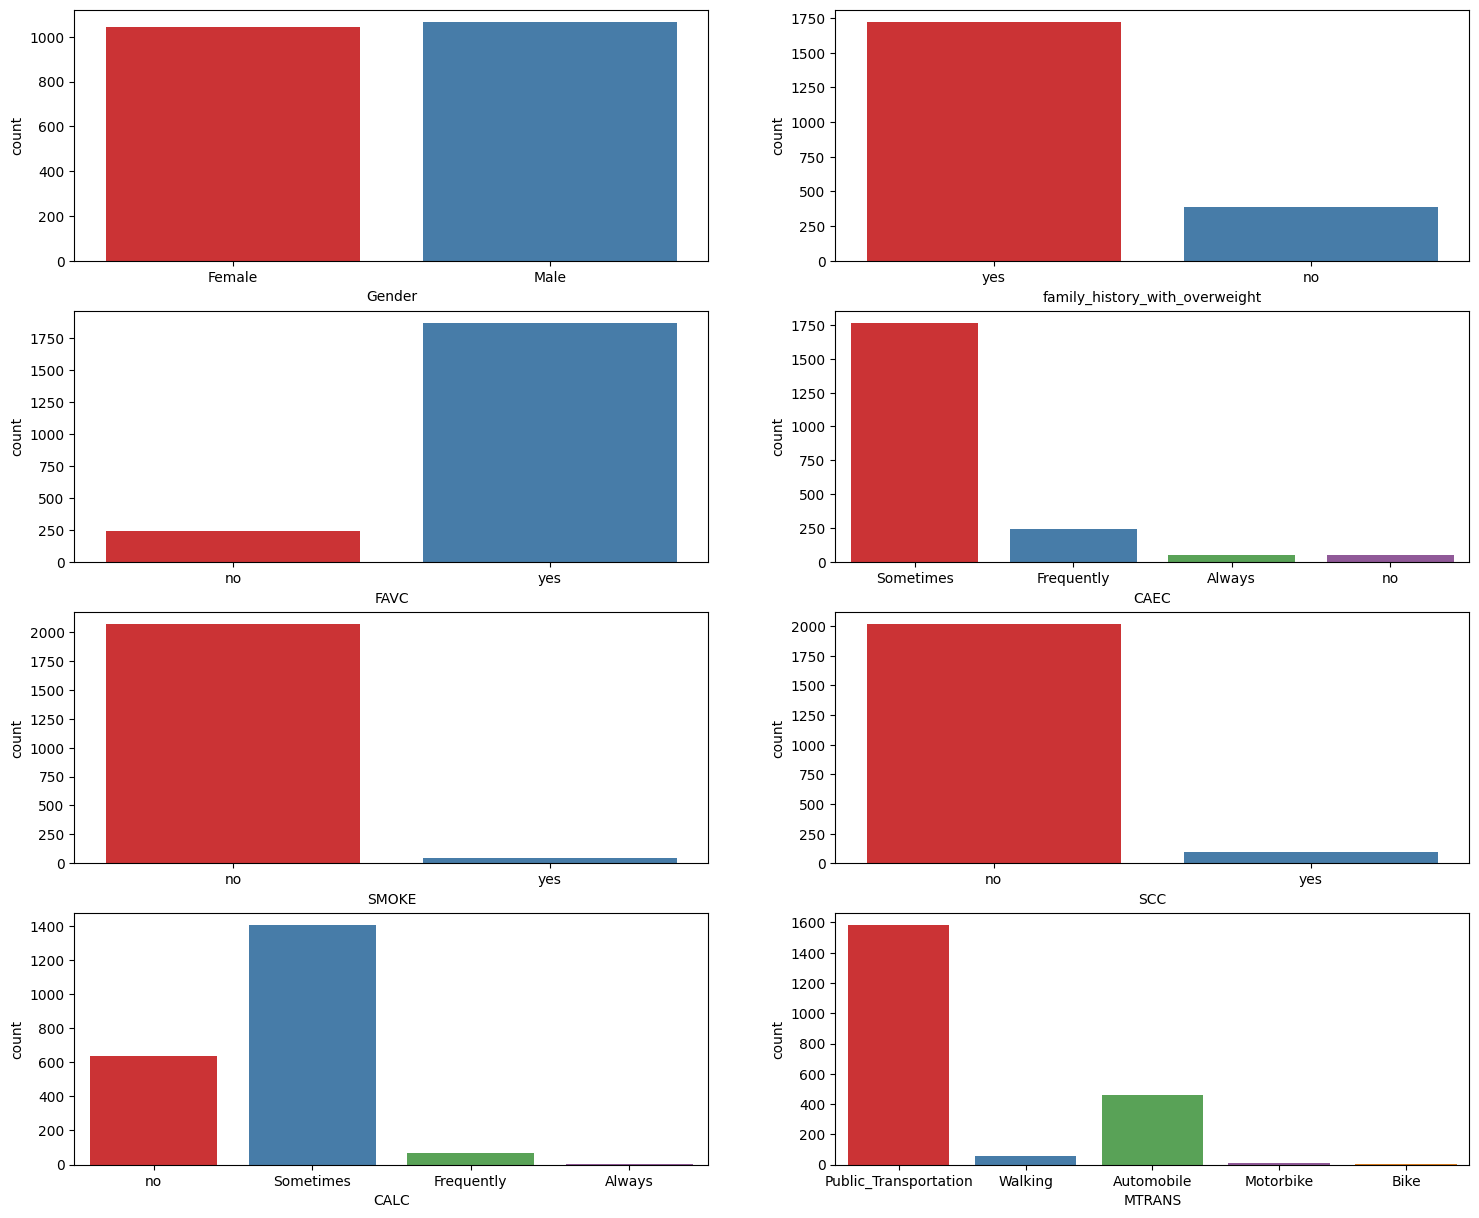

In [11]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="object").columns[:-1]):
    plt.subplot(4,2,i+1)
    sns.countplot(data=data,x=col,palette=sns.color_palette("Set1"))

In [12]:
data.groupby(['NObeyesdad', 'FAVC'])["FAVC"].count()

NObeyesdad           FAVC
Insufficient_Weight  no       51
                     yes     221
Normal_Weight        no       79
                     yes     208
Obesity_Type_I       no       11
                     yes     340
Obesity_Type_II      no        7
                     yes     290
Obesity_Type_III     no        1
                     yes     323
Overweight_Level_I   no       22
                     yes     268
Overweight_Level_II  no       74
                     yes     216
Name: FAVC, dtype: int64

<Axes: xlabel='Age'>

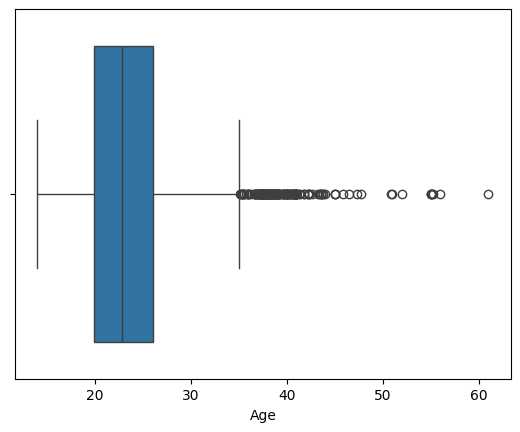

In [13]:
sns.boxplot(data=data,x="Age")

In the above graph show the Age coloumn has many outliers

In [14]:
data=data[np.abs(stats.zscore(data["Age"])) < 2].reset_index(drop=True)

<Axes: xlabel='Age'>

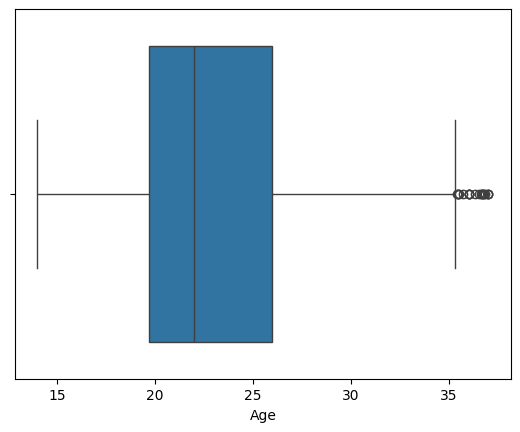

In [15]:
sns.boxplot(data=data,x="Age")

In [16]:
# Assuming weight is in kilograms and height is in meters
data['BMXI'] = data['Weight'] / (data['Height'] ** 2)


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting the features and target variables
features = data.drop(columns=['NObeyesdad', 'BMXI'])
target_bmi = data['BMXI']
target_obesity = data['NObeyesdad']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the data into training and testing sets
X_train, X_test, y_train_bmi, y_test_bmi = train_test_split(features_scaled, target_bmi, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features_scaled, target_obesity, test_size=0.2, random_state=42)

# Gaussian Process Regression for BMI Prediction
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gpr.fit(X_train, y_train_bmi)
y_pred_bmi = gpr.predict(X_test)
mae = mean_absolute_error(y_test_bmi, y_pred_bmi)
print(f'Mean Absolute Error for BMI Prediction: {mae}')

# Classification Model for Obesity Level
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f'Accuracy for Obesity Level Classification: {accuracy}')
print('Classification Report:')
print(classification_report(y_test_cls, y_pred_cls))



Mean Absolute Error for BMI Prediction: 0.09191266052242547
Accuracy for Obesity Level Classification: 0.9619289340101523
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.83      0.98      0.90        54
           2       0.98      0.96      0.97        54
           3       1.00      1.00      1.00        60
           4       1.00      0.98      0.99        64
           5       0.93      0.90      0.92        42
           6       1.00      0.91      0.95        54

    accuracy                           0.96       394
   macro avg       0.96      0.96      0.96       394
weighted avg       0.97      0.96      0.96       394



In [19]:
#Table to show the results obtained

results_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (BMI)', 'Accuracy (Obesity Level)'],
    'Value': [mae, accuracy]
})

# Display the table in a well-formatted way
from IPython.display import display
display(results_df)


,Metric,Value
0,Mean Absolute Error (BMI),0.091913
1,Accuracy (Obesity Level),0.961929


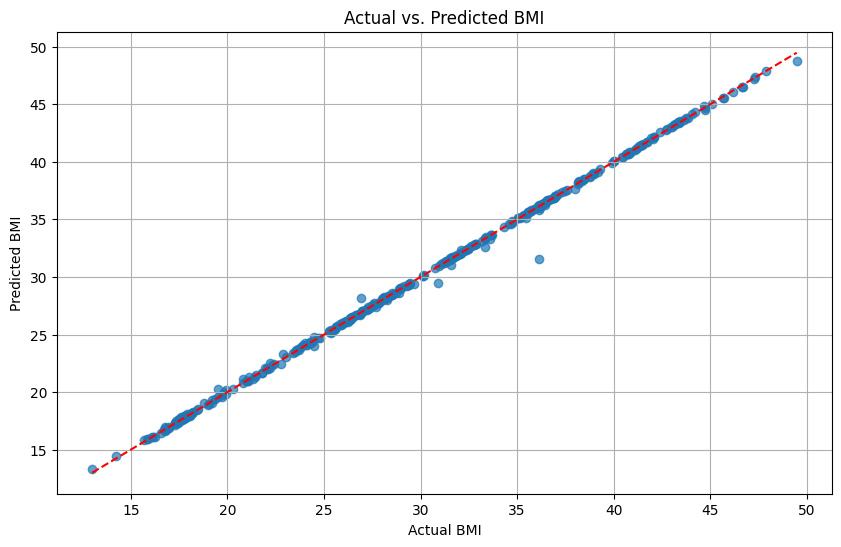

In [20]:
import matplotlib.pyplot as plt
# For BMI prediction
plt.figure(figsize=(10, 6))
plt.scatter(y_test_bmi, y_pred_bmi, alpha=0.7)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs. Predicted BMI')
plt.plot([min(y_test_bmi), max(y_test_bmi)], [min(y_test_bmi), max(y_test_bmi)], linestyle='--', color='red')  # Ideal line
plt.grid(True)
plt.show()
